# House Price Prediction with Ames Housing Dataset

## 1. Introduction

### Getting familiarize with the dataset
   
In this project, we aim to predict house prices using the Ames Housing dataset. We’ll explore the data, preprocess it, select features, train a regression model, evaluate its performance, and suggest improvements. The primary evaluation metric will be the Root Mean Squared Error (RMSE), as it’s standard for regression tasks like house price prediction.

## Step 2. Import Libraries

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV  
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import joblib

%matplotlib inline

## Step 3. Load and Explore the Data

In [23]:
#Objective is to Understand the dataset’s structure and identify patterns.
# Load the dataset (replace 'your_file.csv' with your actual file path)
data = pd.read_csv('train.csv')

# Display basic information
print("Dataset Shape:", data.shape)
print("\nColumns:", data.columns.tolist())
print("\nFirst 5 rows:")
display(data.head())

# Summary statistics
print("\nSummary Statistics:")
display(data.describe())

# Check missing values
print("\nMissing Values:")
missing = data.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
display(missing)



Dataset Shape: (2197, 82)

Columns: ['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual', 'Gara

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,534,531363010,20,RL,80.0,9605,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,159000
1,803,906203120,20,RL,90.0,14684,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,271900
2,956,916176030,20,RL,NaN,14375,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,1,2009,COD,Abnorml,137500
3,460,528180130,120,RL,48.0,6472,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,248500
4,487,528290030,80,RL,61.0,9734,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,167000



Summary Statistics:


,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2197.000000,2.197000e+03,2197.000000,1835.000000,2197.000000,2197.000000,2197.000000,2197.000000,2197.000000,2175.000000,...,2197.000000,2197.000000,2197.000000,2197.000000,2197.000000,2197.000000,2197.000000,2197.000000,2197.000000,2197.000000
mean,1460.512517,7.127872e+08,57.064178,69.549319,10268.070096,6.116523,5.552572,1972.030951,1984.781065,105.101609,...,92.436959,48.768320,22.393719,2.361402,15.954028,2.789713,57.404188,6.189804,2007.793810,182376.851161
std,846.537251,1.887751e+08,42.360690,23.188224,7975.740885,1.429613,1.107019,30.450069,20.898245,184.897165,...,121.422842,69.127588,62.063281,22.843004,56.495484,39.991010,639.103790,2.746902,1.314345,81168.157405
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,13100.000000
25%,733.000000,5.284410e+08,20.000000,58.500000,7500.000000,5.000000,5.000000,1954.000000,1966.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,130000.000000
50%,1452.000000,5.354532e+08,50.000000,69.000000,9488.000000,6.000000,5.000000,1975.000000,1994.000000,0.000000,...,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163500.000000
75%,2196.000000,9.071811e+08,70.000000,80.000000,11660.000000,7.000000,6.000000,2002.000000,2004.000000,166.000000,...,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,2929.000000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,870.000000,742.000000,584.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000



Missing Values:


Pool QC           2185
Misc Feature      2117
Alley             2054
Fence             1778
Mas Vnr Type      1329
Fireplace Qu      1066
Lot Frontage       362
Garage Cond        122
Garage Qual        122
Garage Finish      122
Garage Yr Blt      122
Garage Type        120
Bsmt Exposure       69
BsmtFin Type 2      68
Bsmt Cond           67
Bsmt Qual           67
BsmtFin Type 1      67
Mas Vnr Area        22
BsmtFin SF 1         1
Bsmt Half Bath       1
Bsmt Full Bath       1
Garage Cars          1
Garage Area          1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
Electrical           1
dtype: int64

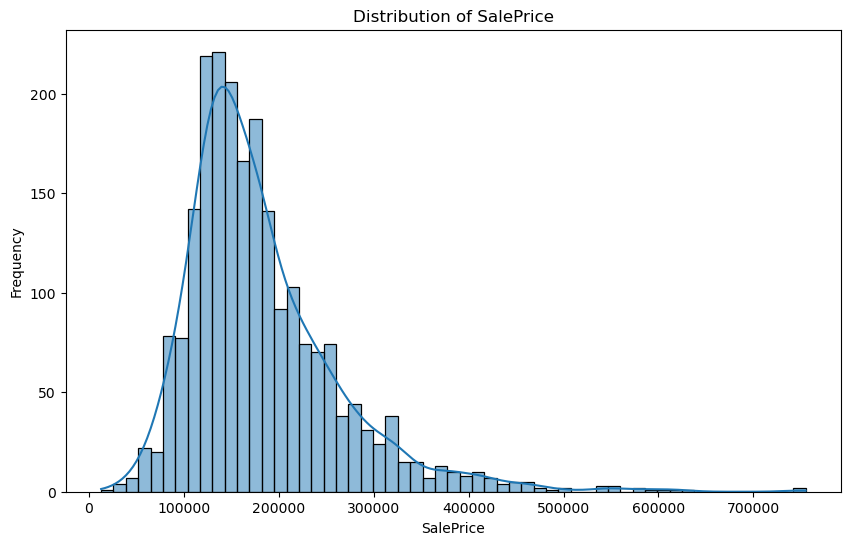

In [10]:
# Visualize SalePrice distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

## Step 4. Data Cleaning and Preprocessing

In [25]:
# Handling missing values
# Separate target and features
y = data['SalePrice']
X = data.drop(['SalePrice', 'PID', 'Order'], axis=1)  # Drop identifiers

# Identify numeric and categorical columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Impute missing values
# Numeric: impute with median
for col in numeric_cols:
    X[col].fillna(X[col].median(), inplace=True)

# Categorical: impute with 'None' for specific columns, mode for others
none_cols = ['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu', 'Garage Type', 
             'Garage Finish', 'Garage Qual', 'Garage Cond', 'Bsmt Qual', 'Bsmt Cond', 
             'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
for col in none_cols:
    if col in X.columns:
        X[col].fillna('None', inplace=True)

for col in categorical_cols:
    if col not in none_cols and col in X.columns:
        X[col].fillna(X[col].mode()[0], inplace=True)

print("Missing Values After Imputation:", X.isnull().sum().sum())

Missing Values After Imputation: 0


In [31]:
#Convert Categorical Variables to Numerical
# Convert Categorical Variables to Numerical
# Define preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ])

# Apply preprocessing
X_preprocessed = preprocessor.fit_transform(X)

# Get feature names
cat_encoder = preprocessor.named_transformers_['cat']
cat_feature_names = cat_encoder.get_feature_names_out(categorical_cols)
feature_names = list(numeric_cols) + list(cat_feature_names)

# Convert to DataFrame
X_preprocessed = pd.DataFrame(X_preprocessed, columns=feature_names)
print("Shape after preprocessing:", X_preprocessed.shape)

Shape after preprocessing: (2197, 317)


## Step 5. Feature Selection (Exploratory)

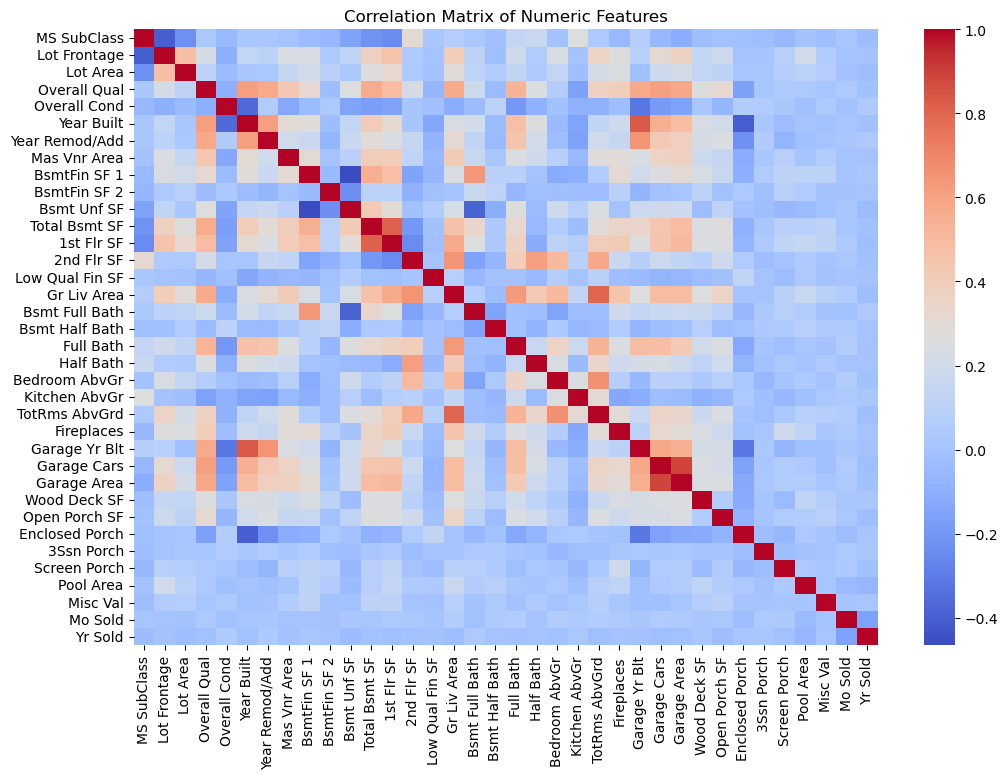

Top 5 correlated features with SalePrice:
SalePrice        1.000000
Overall Qual     0.799928
Gr Liv Area      0.699675
Garage Cars      0.644091
Garage Area      0.637427
Total Bsmt SF    0.629263
Name: SalePrice, dtype: float64


In [34]:
# Correlation analysis for numeric features
corr_matrix = data[numeric_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

# Top correlated features with SalePrice
corr_with_target = data[numeric_cols].join(y).corr()['SalePrice'].sort_values(ascending=False)
print("Top 5 correlated features with SalePrice:")
print(corr_with_target.head(6))  # Includes SalePrice itself

## Step 6. Split Data

In [37]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (1757, 317)
Testing set shape: (440, 317)


## Step 7. Model Training

In [40]:
# Initialize Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

## Step 8. Model Evaluation

In [43]:
# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Training RMSE: {train_rmse:.2f}")
print(f"Testing RMSE: {test_rmse:.2f}")

Training RMSE: 10276.11
Testing RMSE: 27928.26


## Step 9. Model Optimization

In [50]:
# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

# Perform Grid Search
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, 
                           scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
best_rmse = np.sqrt(-grid_search.best_score_)
print(f"Best Cross-Validation RMSE: {best_rmse:.2f}")

# Evaluate best model on test set
best_model = grid_search.best_estimator_
y_test_pred_best = best_model.predict(X_test)
test_rmse_best = np.sqrt(mean_squared_error(y_test, y_test_pred_best))
print(f"Test RMSE with Best Model: {test_rmse_best:.2f}")

Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Best Cross-Validation RMSE: 27702.02
Test RMSE with Best Model: 28064.38


## Step 10. Visualizations

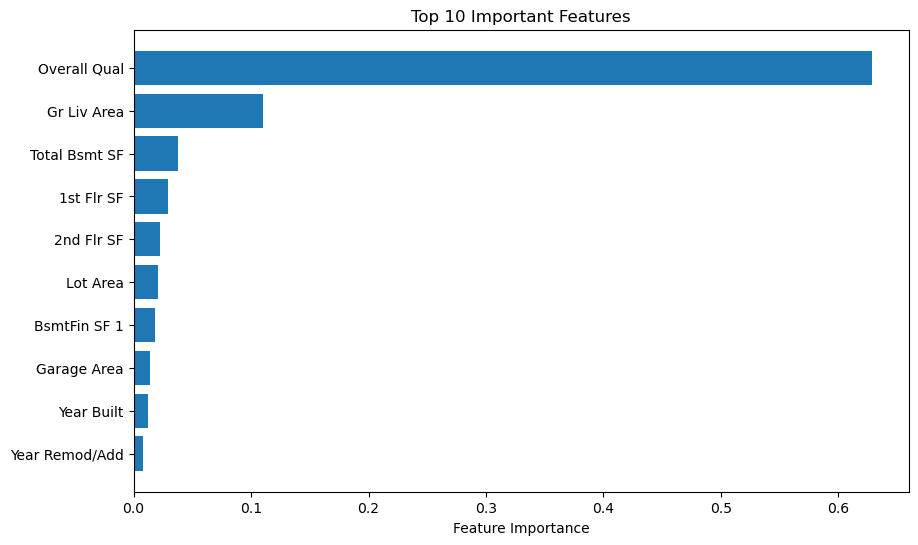

In [53]:
# Feature Importance
# Plot top 10 feature importances
importances = best_model.feature_importances_
indices = np.argsort(importances)[-10:]

plt.figure(figsize=(10, 6))
plt.barh(range(10), importances[indices], align='center')
plt.yticks(range(10), [feature_names[i] for i in indices])
plt.xlabel('Feature Importance')
plt.title('Top 10 Important Features')
plt.show()

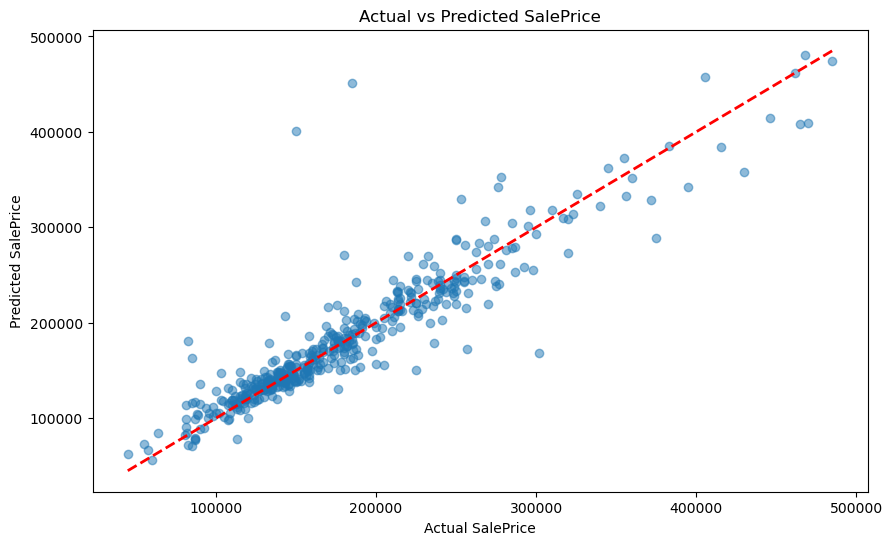

In [57]:
# Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_best, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice')
plt.show()


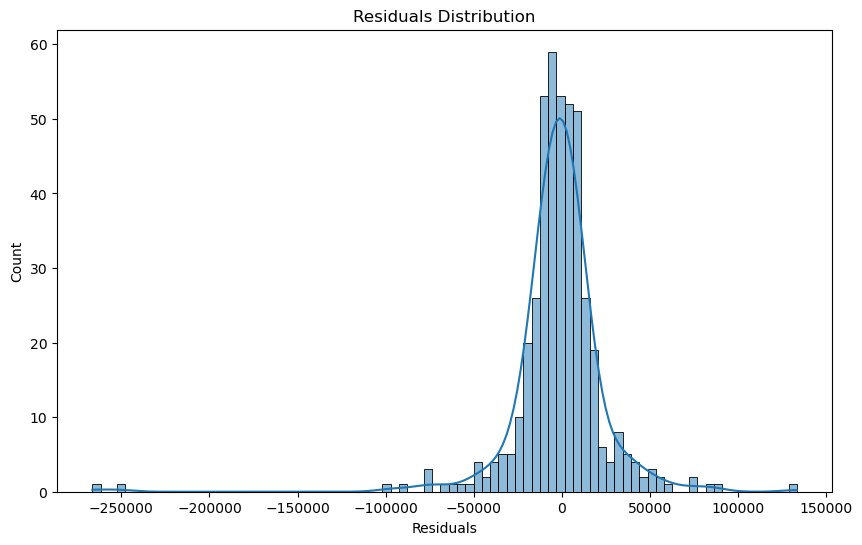

In [59]:
# Residuals
residuals = y_test - y_test_pred_best
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.show()

## Step 11. Save Model

In [62]:
# Save the best model and preprocessor
joblib.dump(best_model, 'random_forest_house_price_model.pkl')
joblib.dump(preprocessor, 'preprocessor.pkl')
print("Model and preprocessor saved.")

Model and preprocessor saved.
